In [85]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def print_image(pixel_intensity, cmap, title):
    plt.imshow(pixel_intensity, cmap=cmap)  
    plt.axis('off')  
    plt.title(title)
    plt.show()

def perform_dilation(edges, no_of_interation):
    # kernal for dilation
    kernel = np.ones((3,3), np.uint8)
    return cv2.dilate(edges, kernel, iterations=1)

def find_approx_contours(edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to reduce the number of points
    epsilon = 0.00001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

def print_apple_image_with_boundary_points(image, boundary_points, apple_label):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), origin='lower')
    plt.scatter(*zip(*boundary_points), color='green', s=1)
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f'Boundary Points of the Apple {apple_label}')
    plt.show()
    
# Function to find the boundary points of the apple in the image
def find_boundary_points(image_path):

    # Loading and converting image to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image with guassian kernal of 11*11, higher the kernal size that blurring effect will be more pronounced
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)
    # print_image(blurred, 'gray', 'Blurred Image')
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 30, 150)
    # print_image(edges, 'gray', 'Canny Edges')
    
    # kernal for dilation
    kernel = np.ones((3,3), np.uint8)
    edges = perform_dilation(edges, 1)
    # print_image(edges, 'gray', 'Canny Edges After Dilation')

    approx = find_approx_contours(edges)
    # Convert the boundary points to a list of tuples
    boundary_points = [tuple(point[0]) for point in approx]
    return boundary_points

# directory = '../Dataset_Cropped'
# for filename in os.listdir(directory):
#     # print(os.path.join(directory, filename))
#     if os.path.isfile(os.path.join(directory, filename)):
#         filename = filename[:-4]
#         if len(filename) != 2:
#             continue
#         print(filename)
#         image_path = f'../Dataset_Cropped/{filename}.jpg'
#         boundary_points = find_boundary_points(image_path)
#         image = cv2.imread(image_path)
#         print_apple_image_with_boundary_points(image, boundary_points, filename)

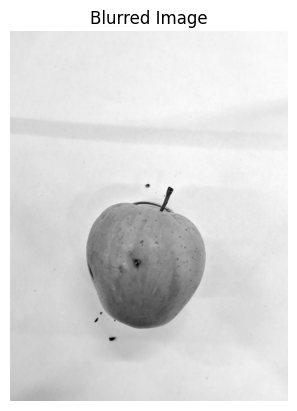

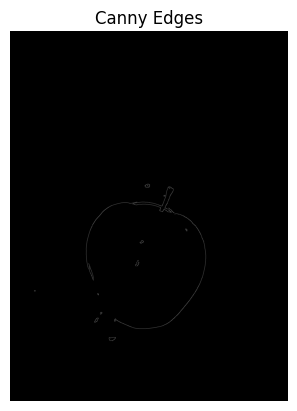

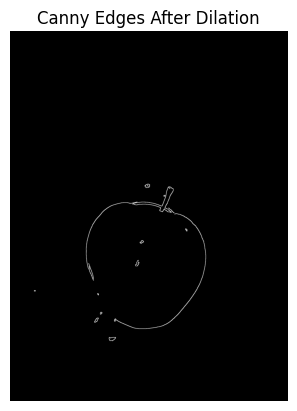

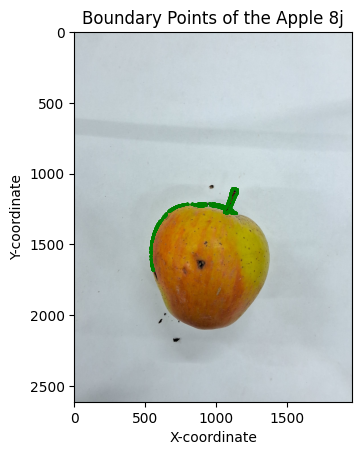

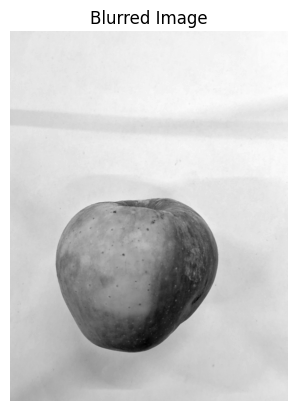

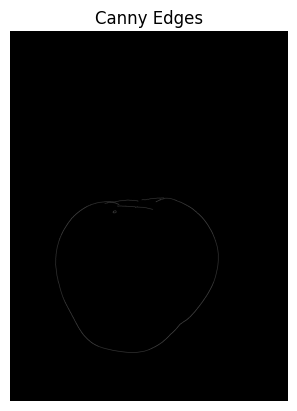

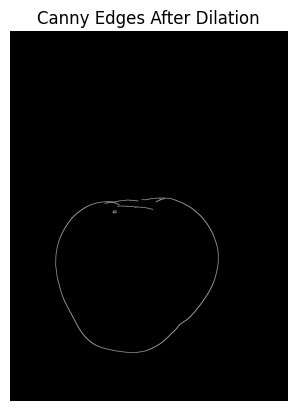

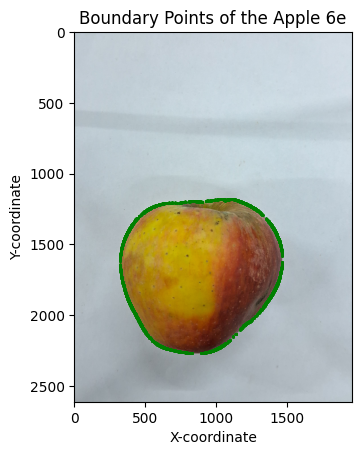

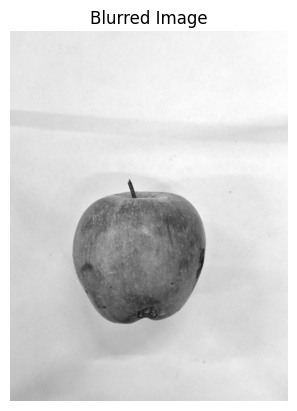

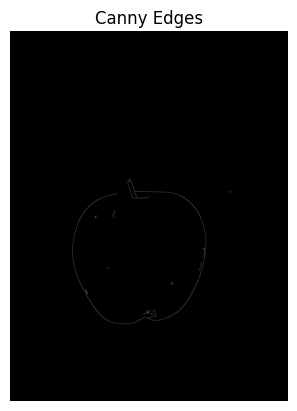

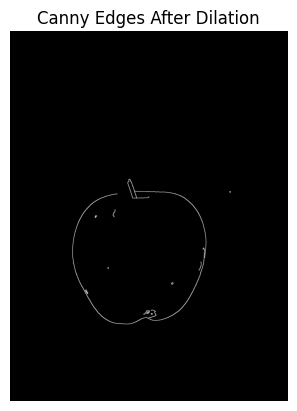

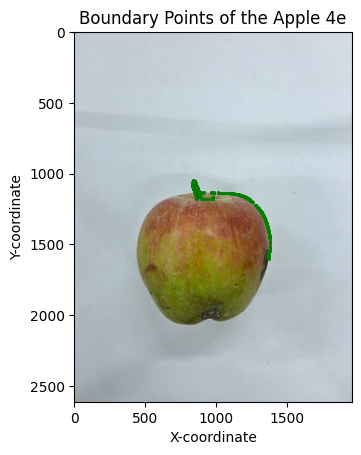

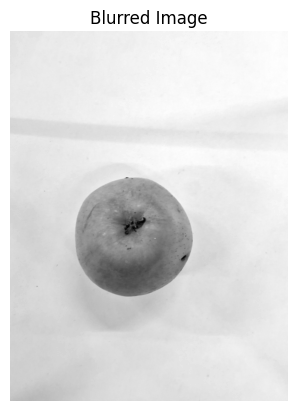

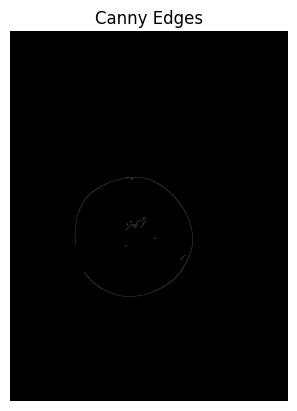

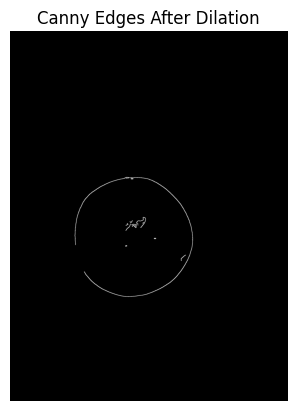

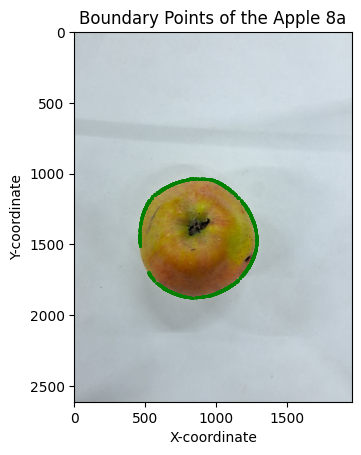

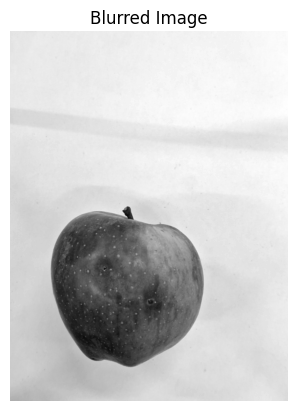

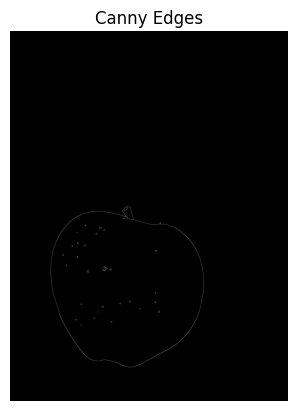

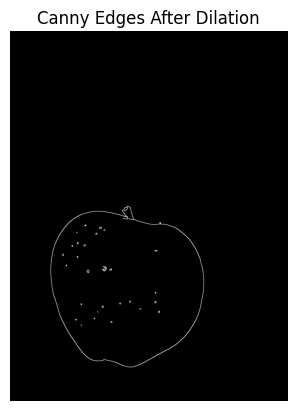

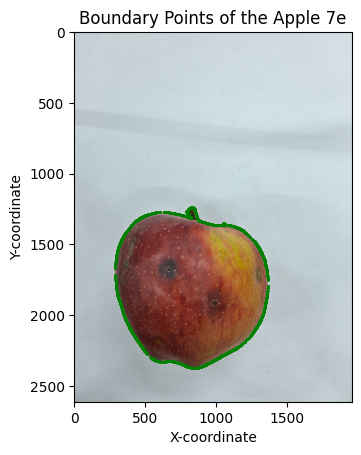

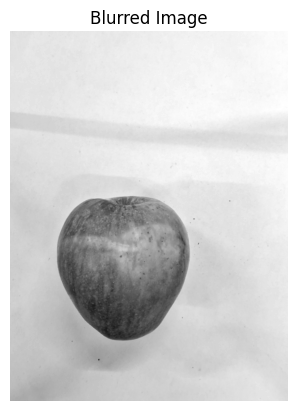

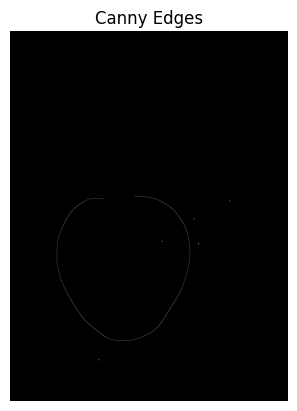

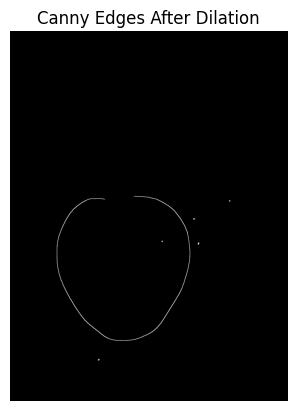

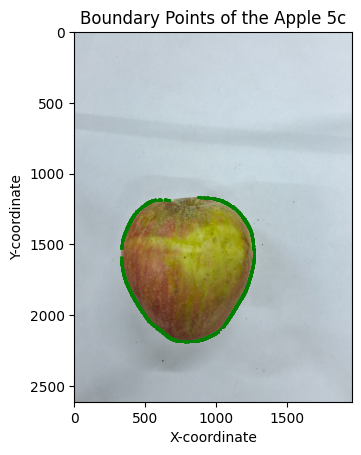

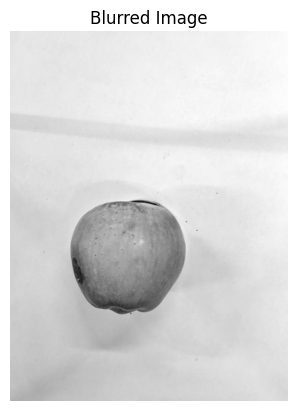

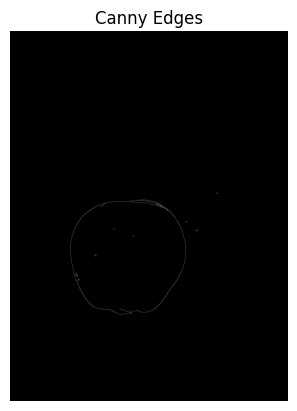

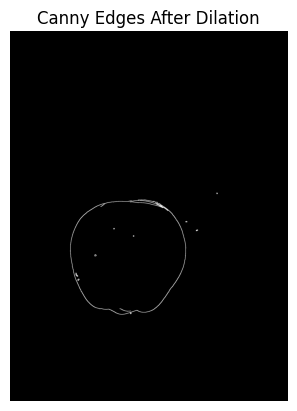

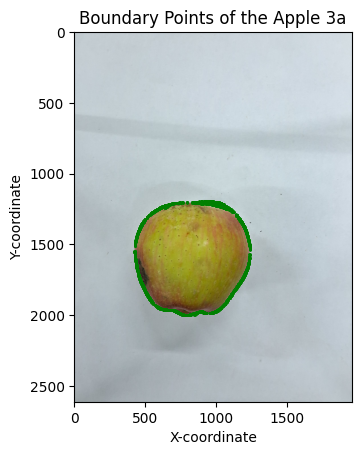

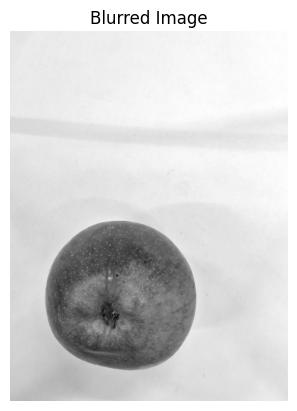

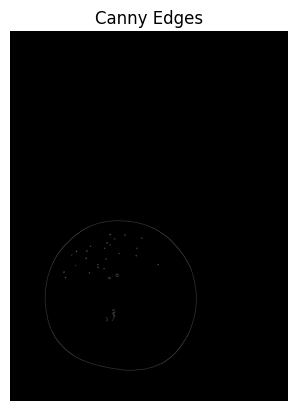

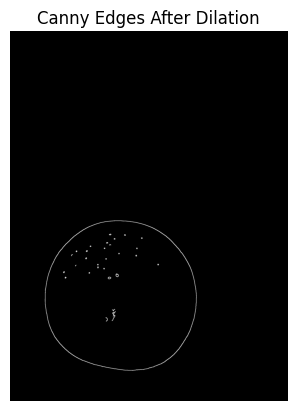

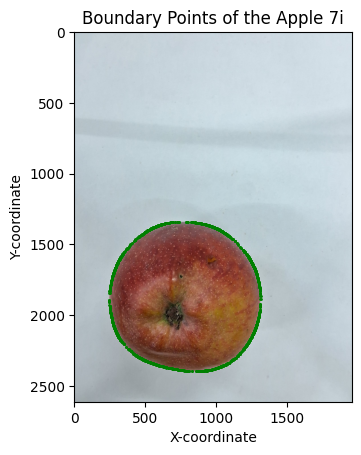

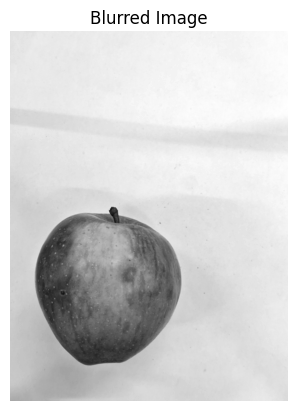

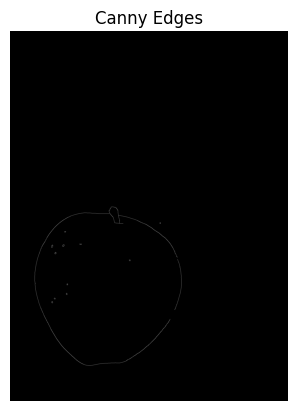

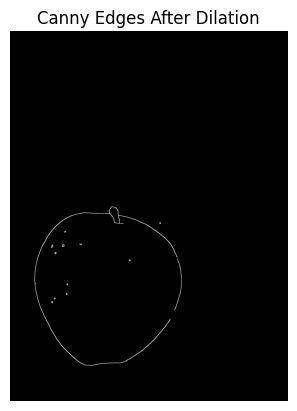

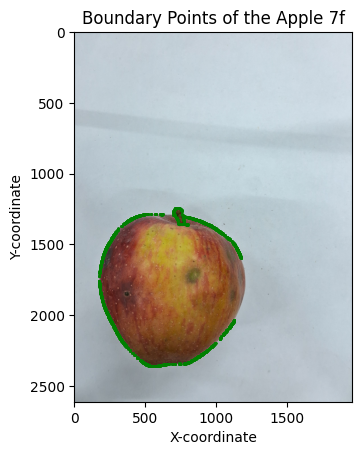

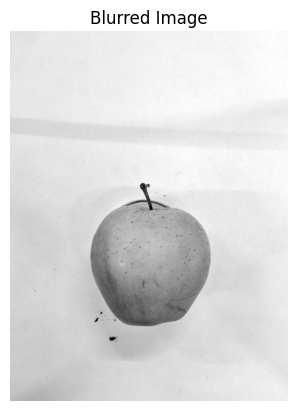

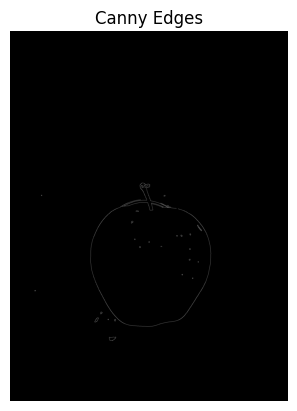

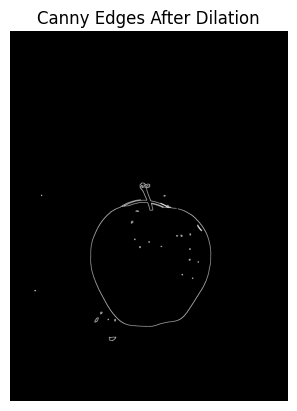

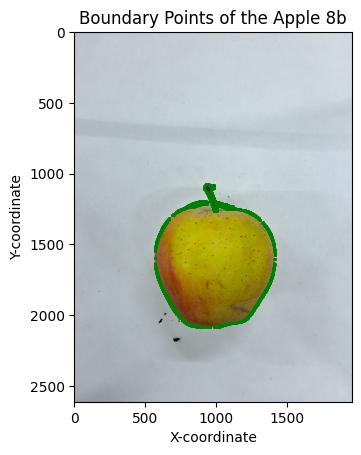

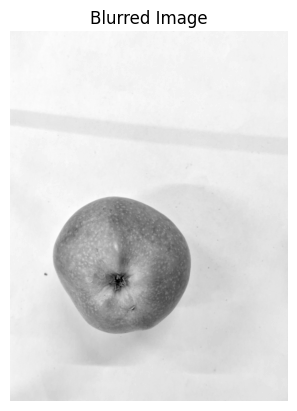

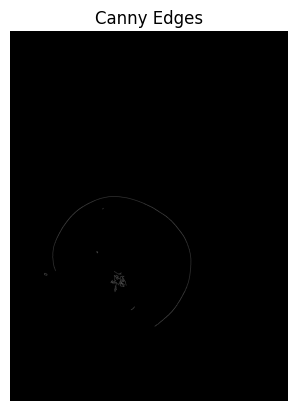

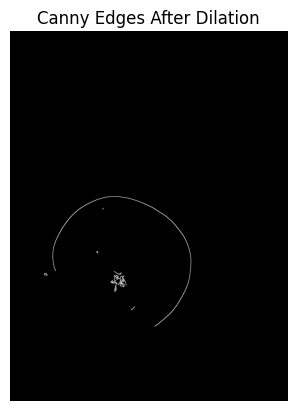

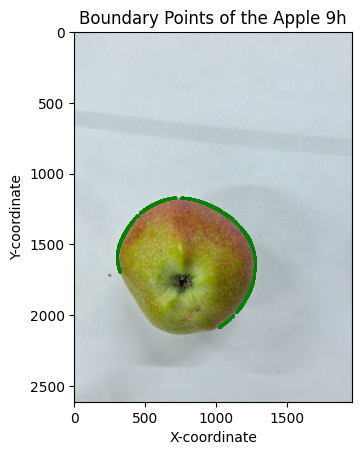

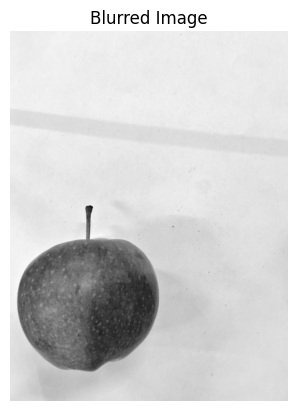

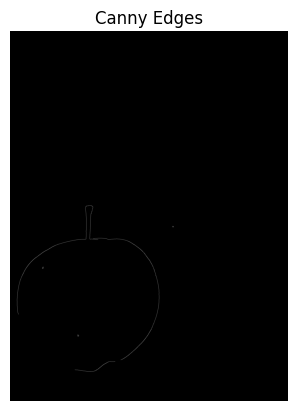

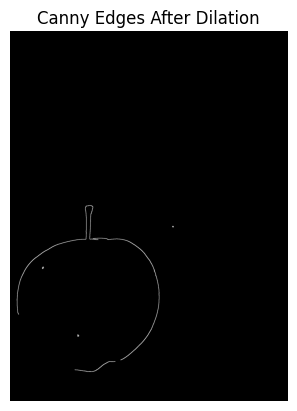

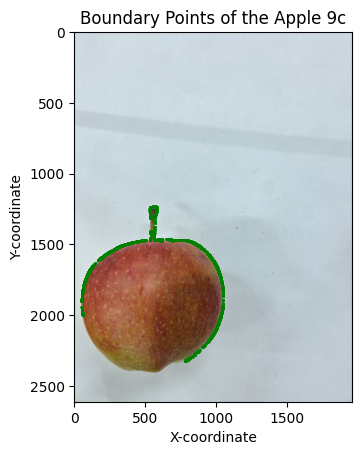

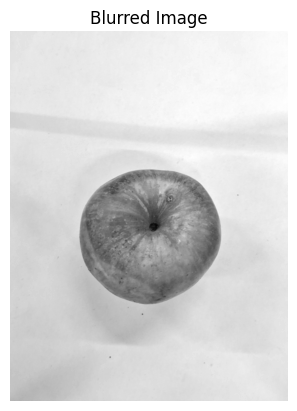

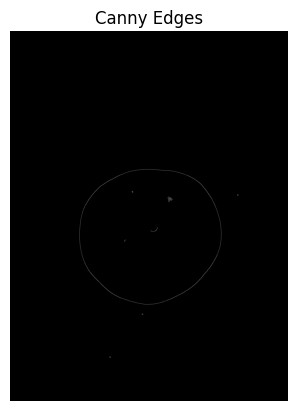

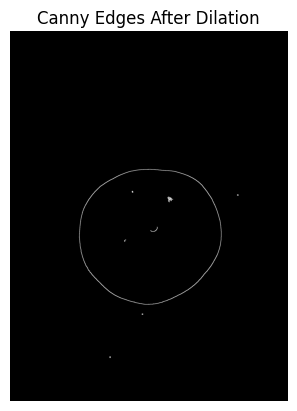

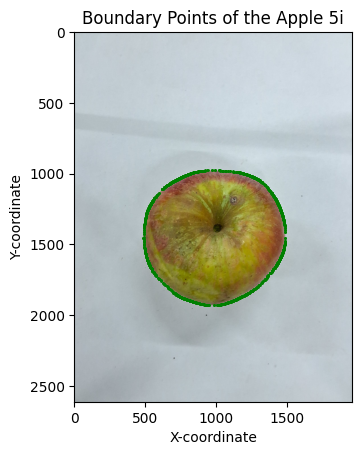

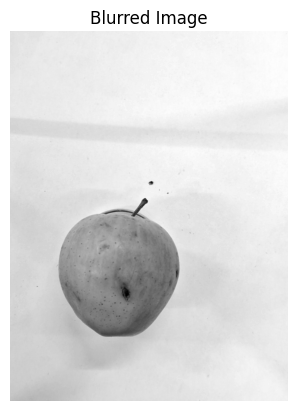

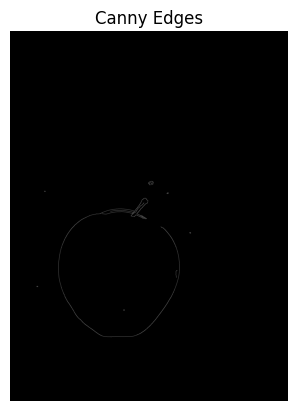

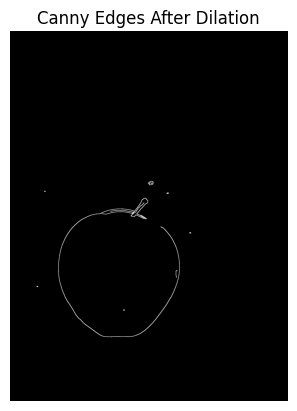

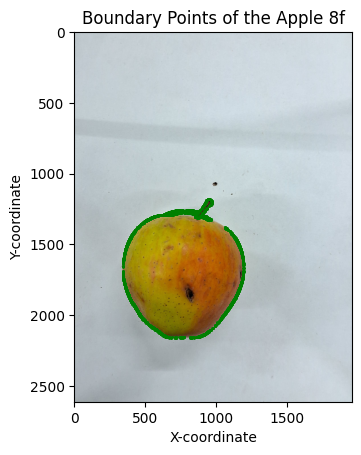

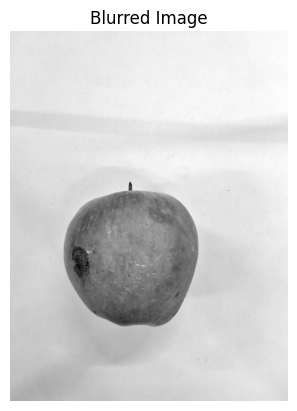

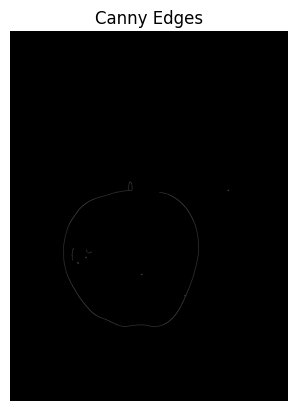

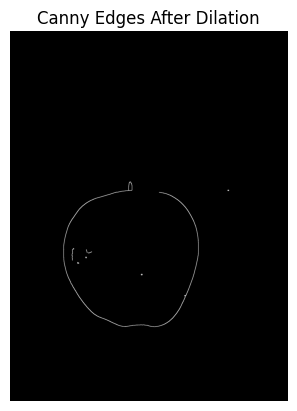

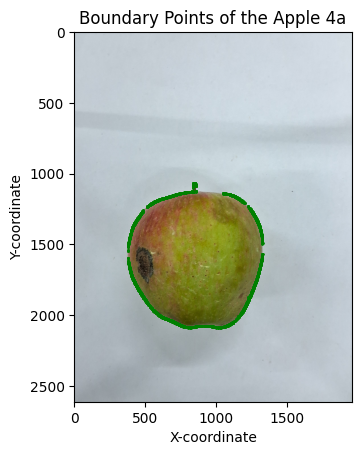

In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def print_image(pixel_intensity, cmap, title):
    plt.imshow(pixel_intensity, cmap=cmap)  
    plt.axis('off')  
    plt.title(title)
    plt.show()

def perform_dilation(edges, no_of_interation):
    # kernal for dilation
    kernel = np.ones((3,3), np.uint8)
    return cv2.dilate(edges, kernel, iterations=1)

def find_approx_contours(edges):
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to reduce the number of points
    epsilon = 0.000001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    return approx

def print_apple_image_with_boundary_points(image, boundary_points, apple_label):
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), origin='lower')
    plt.scatter(*zip(*boundary_points), color='green', s=1)
    plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
    plt.gca().set_aspect('equal', adjustable='box')  # Set aspect ratio to be equal
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title(f'Boundary Points of the Apple {apple_label}')
    plt.show()


# Function to find the boundary points of the apple in the image
def find_boundary_points(image_path):

    # Loading and converting image to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image with guassian kernal of 11*11, higher the kernal size that blurring effect will be more pronounced
    blurred = cv2.GaussianBlur(gray, (11, 11), 0)
    print_image(blurred, 'gray', 'Blurred Image')
    
    # Perform Canny edge detection
    edges = cv2.Canny(blurred, 45, 150)
    print_image(edges, 'gray', 'Canny Edges')
    
    # kernal for dilation
    kernel = np.ones((3,3), np.uint8)
    edges = perform_dilation(edges, 1)
    print_image(edges, 'gray', 'Canny Edges After Dilation')

    approx = find_approx_contours(edges)
    # Convert the boundary points to a list of tuples
    boundary_points = [tuple(point[0]) for point in approx]
    return boundary_points

count = 0
directory = '../Dataset_Cropped'
for filename in os.listdir(directory):
    # print(os.path.join(directory, filename))
    if os.path.isfile(os.path.join(directory, filename)):
        filename = filename[:-4]
        if len(filename) != 2 or count >= 15:
            continue
        count+=1
        image_path = f'../Dataset_Cropped/{filename}.jpg'
        boundary_points = find_boundary_points(image_path)
        image = cv2.imread(image_path)
        print_apple_image_with_boundary_points(image, boundary_points, filename)